Measurement Results: [3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 2, 1, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1, 0, 3, 3, 1, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 1, 3, 0, 3, 3, 1, 1, 1, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 2, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 

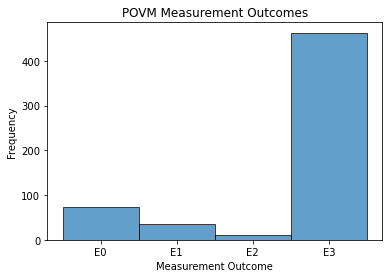

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Qutrit sisteminde temel durumları tanımla |0>, |1>, |2>
basis0 = basis(3, 0)
basis1 = basis(3, 1)
basis2 = basis(3, 2)

# Ölçülecek durumu tanımla (|0> + |1> + |2>)/√3
state = (basis0 + basis1 + basis2).unit()

# POVM elemanlarını tanımla
E0 = (1/2) * basis0 * basis0.dag()
E1 = (1/3) * basis1 * basis1.dag()
E2 = (1/6) * basis2 * basis2.dag()
E3 = qeye(3) - E0 - E1 - E2  # Son POVM elemanı, ölçümlerin toplamının birim operatör olmasını sağlar

# POVM elemanlarının listesini oluştur
POVM_elements = [E0, E1, E2, E3]

# Monte Carlo simülasyonu için ölçüm sayısını belirle
num_measurements = 1000
results = []

# Ölçümleri gerçekleştir ve sonuçları kaydet
for _ in range(num_measurements):
    rand_val = np.random.rand()
    cumulative_prob = 0
    for i, E in enumerate(POVM_elements):
        cumulative_prob += (E * state).norm()**2
        if rand_val < cumulative_prob:
            results.append(i)
            break

# Ölçüm sonuçlarını yazdır
print("Measurement Results:", results)

# Histogramı çiz
plt.hist(results, bins=np.arange(5)-0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(4), ['E0', 'E1', 'E2', 'E3'])
plt.xlabel('Measurement Outcome')
plt.ylabel('Frequency')
plt.title('POVM Measurement Outcomes')
plt.show()
